#### Setup

In [1]:
import matplotlib.pyplot as plt

import torch

import pyciemss
from pyciemss.PetriNetODE.interfaces import setup_model, reset_model, intervene, sample, calibrate, optimize, load_petri_model
import mira
from pyciemss.utils import get_tspan

import warnings
warnings.filterwarnings('ignore')

## SIR MIRA

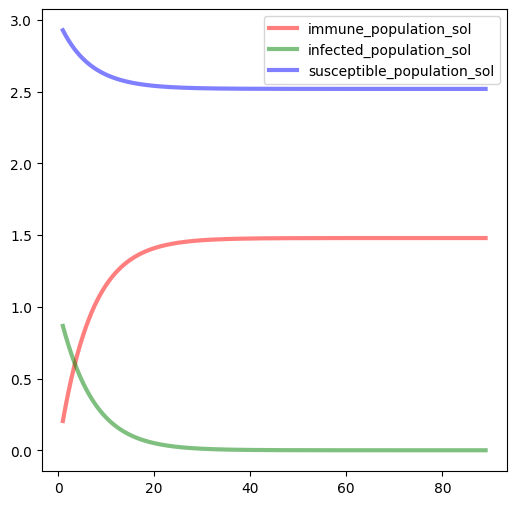

In [17]:
from mira.examples.sir import sir_parameterized as sir
full_tspan = get_tspan(1, 89, 890)
mira_model = load_petri_model(sir, add_uncertainty=True)
mira_model = setup_model(mira_model, start_time=0, start_state=dict(susceptible_population=3.0,
                                                                    infected_population=1.0,
                                                                    immune_population=0.0))
solution = sample(mira_model, timepoints=full_tspan, num_samples=1)

fig = plt.figure(facecolor='w', figsize=(6, 6))
ax = fig.add_subplot(111, axisbelow=True)
colors=['red','green','blue','black','gold']
for i,var in enumerate(list(solution.keys())[2:]):
    ax.plot(full_tspan, solution[var].squeeze().detach().numpy(), colors[i],
            alpha=0.5, lw=3, label=var)
ax.legend()
plt.show()

## SIR Handmade

SIR_with_uncertainty()


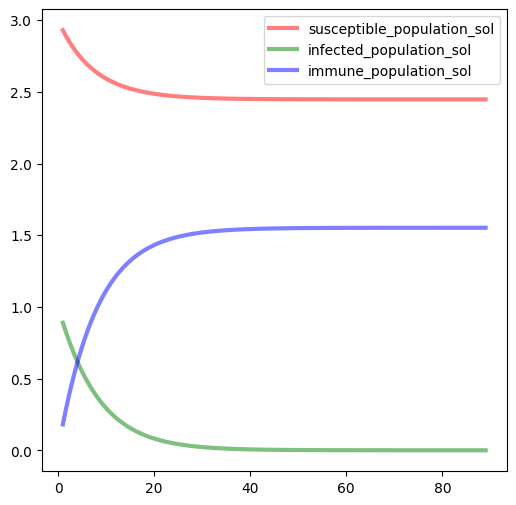

In [16]:
from pyciemss.PetriNetODE.models import SIR_with_uncertainty
from pyro.infer import Predictive
full_tspan = get_tspan(1, 89, 890)
SIR_model  = SIR_with_uncertainty(N=100.0, beta=0.1, gamma=0.2) # N here unecessary, makes its own
SIR_model = setup_model(SIR_model, start_time=0, start_state=dict(susceptible_population=3.0,
                                                                  infected_population=1.0,
                                                                  immune_population=0.0))
solution   = sample(SIR_model,full_tspan,1)

fig = plt.figure(facecolor='w', figsize=(6, 6))
ax = fig.add_subplot(111, axisbelow=True)
colors=['red','green','blue','black','gold']
for i,var in enumerate(list(solution.keys())[2:]):
    ax.plot(full_tspan, solution[var].squeeze().detach().numpy(), colors[i],
            alpha=0.5, lw=3, label=var)
ax.legend()
plt.show()